In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = spark.read.csv("/FileStore/tables/Heart_disease_cleveland_new.csv", header=True, sep=',')
df = df.toPandas()

**Renomeando as colunas**

In [0]:
df = df.rename(columns={'cp': 'chest_pain_type'}) #tipo de pressão toráxica 
df = df.rename(columns={'trestbps': 'trest_bps'}) #pressão arterial
df = df.rename(columns={'chol': 'chol_level'}) #colesterol
df = df.rename(columns={'fbs': 'blood_sugar'}) #taxa de glicemia
df = df.rename(columns={'restecg': 'rest_ecg'}) #eletrocardiograma em repouso
df = df.rename(columns={'exang': 'exercise_angina'}) #angina induzida pelo exercício física
df = df.rename(columns={'oldpeak': 'old_peak'}) #depressão de ST induzida por exercício em relação ao repouso
df = df.rename(columns={'ca': 'colored_vessels'}) #número de vasos principais coloridos por fluoroscopia (0-3)
# df.rename(columns={'thal': ''}) #Talassemia: 1 = normal; 2 = problema corrigido; 3 = problema reversível
# df.rename(columns={'target': ''}) #1 - tem a doença, 0 - não tem

In [0]:
df.head()

,age,sex,chest_pain_type,trest_bps,chol_level,blood_sugar,rest_ecg,thalach,exercise_angina,old_peak,slope,colored_vessels,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [0]:
df.describe()

,age,sex,chest_pain_type,trest_bps,chol_level,blood_sugar,rest_ecg,thalach,exercise_angina,old_peak,slope,colored_vessels,thal,target
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,41,2,4,50,152,2,3,91,2,40,3,4,3,2
top,58,1,3,120,204,0,0,162,0,0,0,0,1,0
freq,19,206,144,37,6,258,151,11,204,99,142,180,168,164


**Verificação da presença de elementos nulos**

In [0]:
print(df.isnull().sum())

age                0
sex                0
chest_pain_type    0
trest_bps          0
chol_level         0
blood_sugar        0
rest_ecg           0
thalach            0
exercise_angina    0
old_peak           0
slope              0
colored_vessels    0
thal               0
target             0
dtype: int64


**Verificação do tamanho da base de dados**

In [0]:
df.shape

Out[7]: (303, 14)

**Associação do valor "1" para feminino e "0" para masculino e criação de nova coluna**

In [0]:
df['sex_name'] = df['sex'].replace(['0'], 'female')
df['sex_name'] = df['sex_name'].replace(['1'], 'male')
df['sex_name'].head()

Out[8]: 0      male
1      male
2      male
3      male
4    female
Name: sex_name, dtype: object

####Distribuição total de participantes por sexo<h4>

Out[9]: male      0.679868
female    0.320132
Name: sex_name, dtype: float64

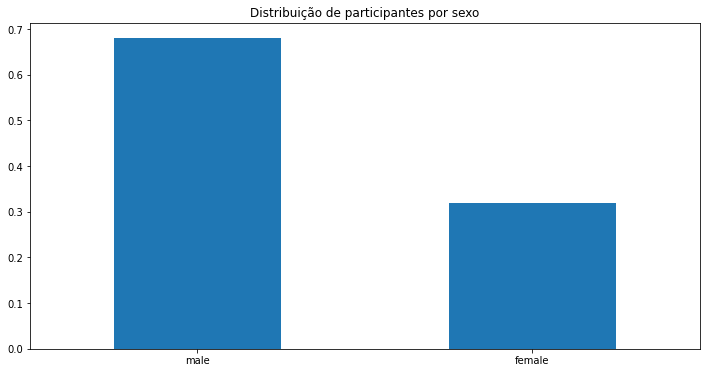

In [0]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição de participantes por sexo')
sex_count = df['sex_name'].value_counts(normalize=True).plot(kind='bar', rot=0);
sex_count_table = df['sex_name'].value_counts(normalize=True);
sex_count_table

####Análise relacionada ao sexo com presença de doença cardiaca<h4>
  
Legenda:  
"1": Presença de doença cardiovascular  
"0": Ausência de doença cardiovascular

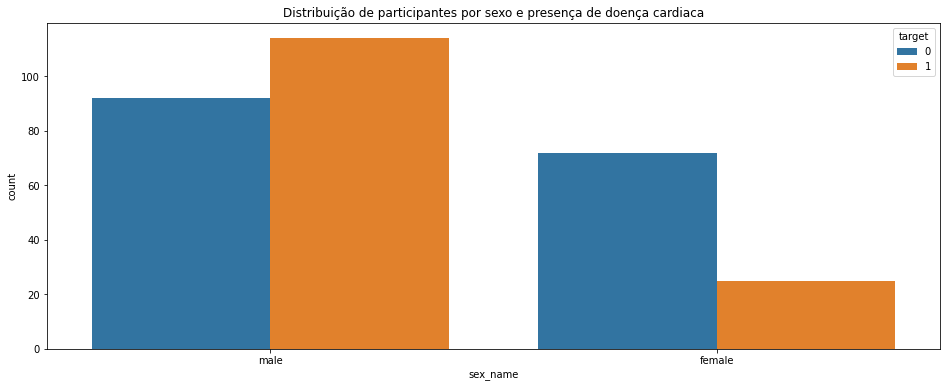

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição de participantes por sexo e presença de doença cardiaca')
sns.countplot(data=df, x='sex_name', hue='target');


In [0]:
sex_target = pd.crosstab(df['sex_name'], df['target'])

sex_target


target,0,1
sex_name,,
female,72,25
male,92,114


In [0]:
sex_target_percent = pd.crosstab(df['sex_name'], df['target'], normalize='index')
sex_target_percent

target,0,1
sex_name,,
female,0.742268,0.257732
male,0.446602,0.553398


####Considerações acerca do sexo em relação a possuir ou não doenças cardiovasculares
Nota-se que mais homens possuem doenças cardiacas do que mulheres. Sendo que, do número total de mulheres, apenas 26% possuem doenças cardiovasculares contra 55% do total de homens.

####Análises relacionadas a idade e possuir ou não doenças

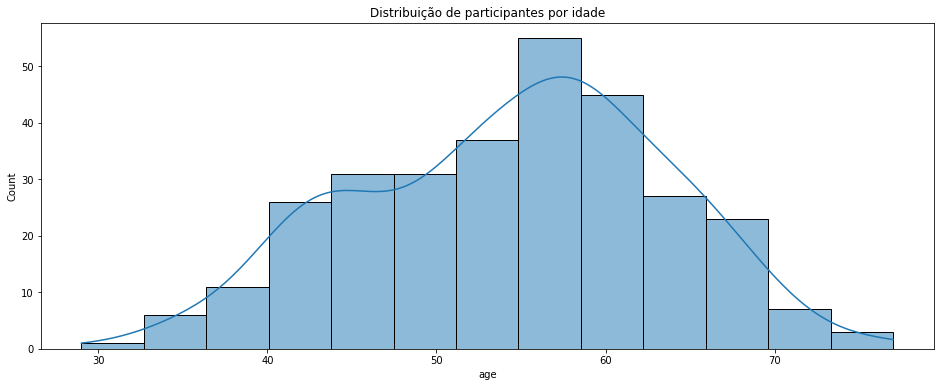

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição de participantes por idade');
sns.histplot(data=df, x=df['age'].astype(int),kde = True);


Nota-se que a maior parte dos participantes possuem entre 50 a 60 anos

#### Distribuição de doenças cardiovasculares por idade

Legenda:  
"1": Presença de doença cardiovascular  
"0": Ausência de doença cardiovascular

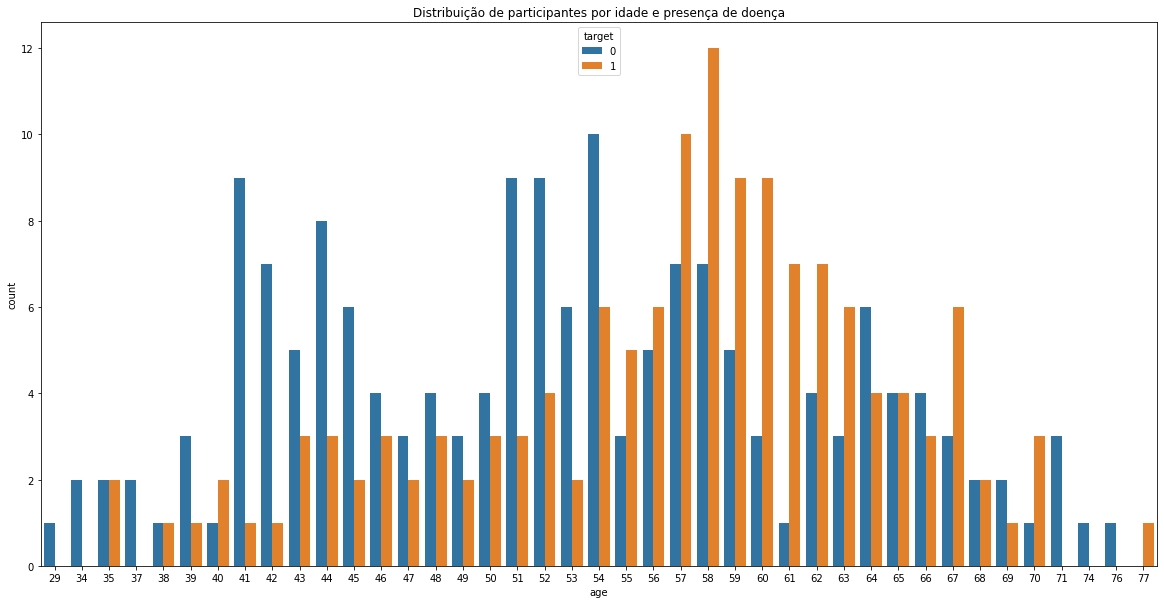

In [0]:
plt.figure(figsize=(20, 10))
plt.title('Distribuição de participantes por idade e presença de doença')
sns.countplot(data=df, x=df['age'].astype(int), hue='target');


Nota-se que a maior insidência de doença entre 55 e 65 anos.

#### Distribuição de participantes por nível glicêmico e presença de doença cardiovascular 

Legenda:  
"1": taxa de glicemia > 120mg/dl - elevada  
"0": taxa de glicemia < 120mg/dl - normal

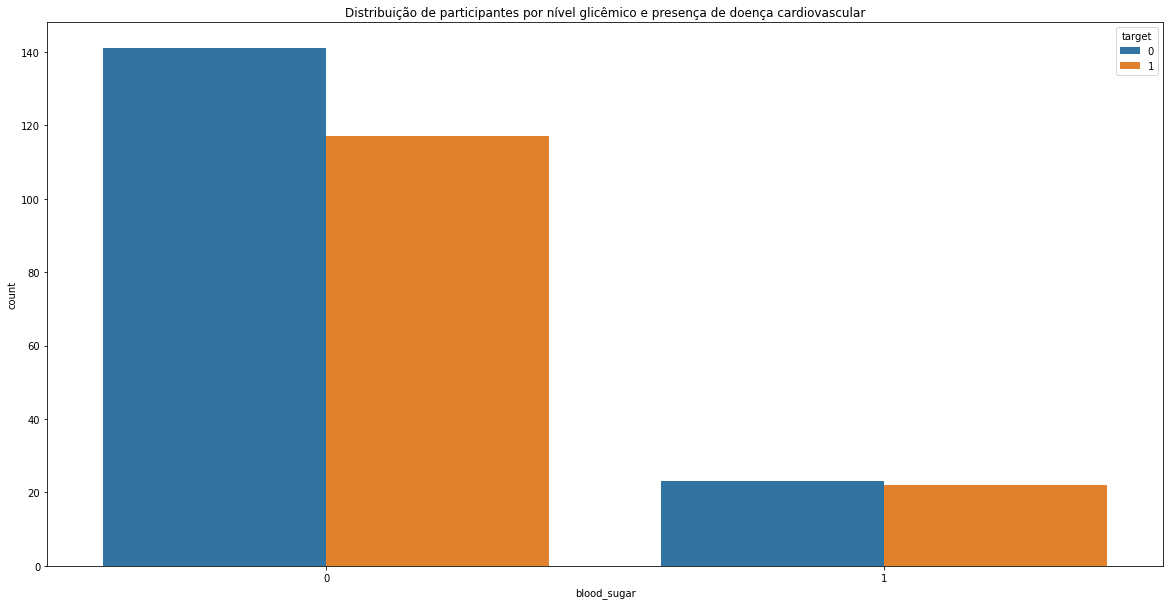

In [0]:
plt.figure(figsize=(20, 10))
plt.title('Distribuição de participantes por nível glicêmico e presença de doença cardiovascular')
sns.countplot(data=df, x=df['blood_sugar'].astype(int), hue='target');

####Distribuição de participantes por idade e nível glicêmico

Legenda:  
"1": taxa de glicemia > 120mg/dl - elevada  
"0": taxa de glicemia < 120mg/dl - normal

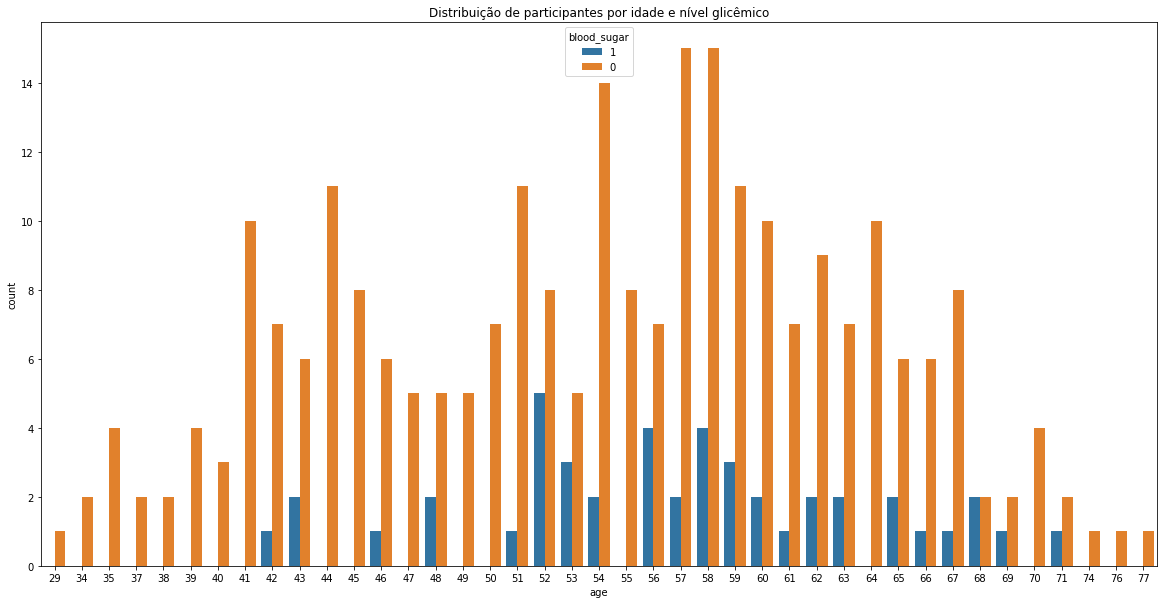

In [0]:
plt.figure(figsize=(20, 10))
plt.title('Distribuição de participantes por idade e nível glicêmico')
sns.countplot(data=df, x=df['age'].astype(int), hue='blood_sugar');

Nota-se que há uma concentração de pessoas com índice glicêmico elevado na faixa de 50 a 65 anos.

####Análise em relação ao nível de colesterol

In [0]:
df['chol_level'] = df['chol_level'].astype(int)
df.loc[df.chol_level >= 240, 'chol_class'] = 'high'
df.loc[(df.chol_level < 240) & (df.chol_level > 200),  'chol_class'] = 'medium'
df.loc[df.chol_level <= 200, 'chol_class'] = 'normal'

**Criação de coluna auxiliar "chol_class" para classificação dos níveis de colesterol**

In [0]:
df.head(100)

,age,sex,chest_pain_type,trest_bps,chol_level,blood_sugar,rest_ecg,thalach,exercise_angina,old_peak,slope,colored_vessels,thal,target,sex_name,chol_class
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,male,medium
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,male,high
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,male,medium
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,male,high
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,female,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,1,3,128,255,0,0,161,1,0,0,1,3,1,male,high
96,59,1,3,110,239,0,2,142,1,1.2,1,1,3,1,male,medium
97,60,0,3,150,258,0,2,157,0,2.6,1,2,3,1,female,high
98,52,1,1,134,201,0,0,158,0,0.8,0,1,1,0,male,medium


####Distribuição da classificação de colesterol por doença cardiovascular
Legenda:  
"1": Presença de doença cardiovascular  
"0": Ausência de doença cardiovascular

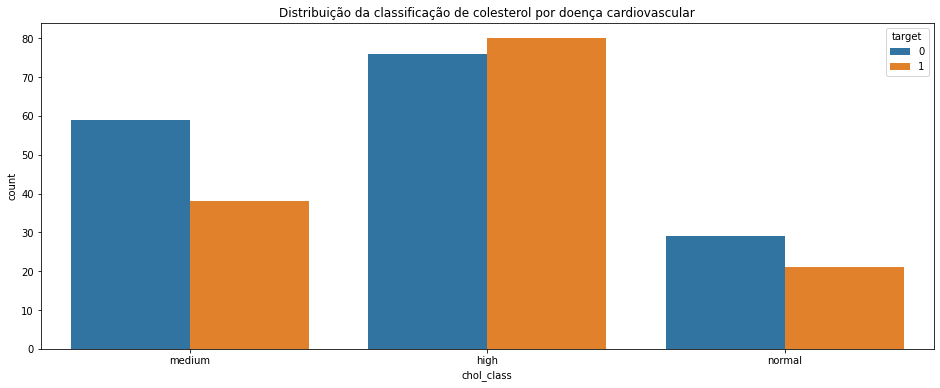

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição da classificação de colesterol por doença cardiovascular')
sns.countplot(data=df, x=df['chol_class'], hue='target');

####Análise em relação a quantidade de vasos coloridos apresentados em exame

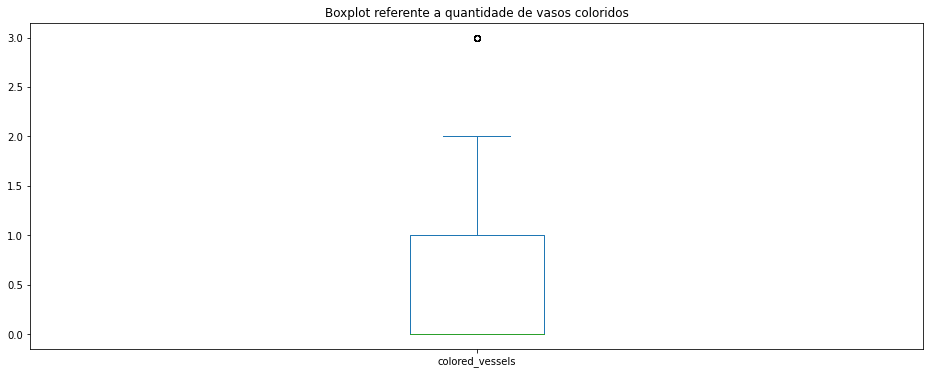

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot referente a quantidade de vasos coloridos');
df['colored_vessels'].astype(int).plot(kind='box');

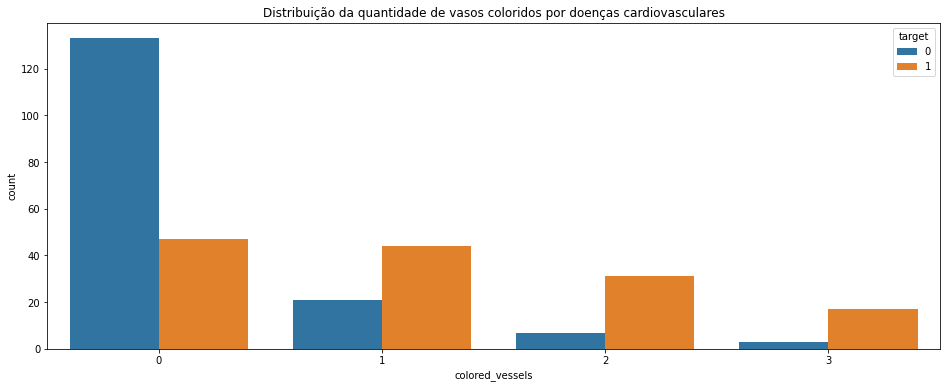

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição da quantidade de vasos coloridos por doenças cardiovasculares')
sns.countplot(data=df,  x=df['colored_vessels'].astype(int), hue='target');

Nota-se que a mediana está em 0 vasos coloridos, sendo que a maior parte da amostra possue de 0 a 1 vasos coloridos. Além disso, poucas pessoas possuem 3 vasos coloridos.

####Análise em relação a classificação de dores no peito

Legenda:  
 "0" = angina típica  
 "1" = angina atípica  
 "2" = dor não anginosa  
 "3" = assintomático

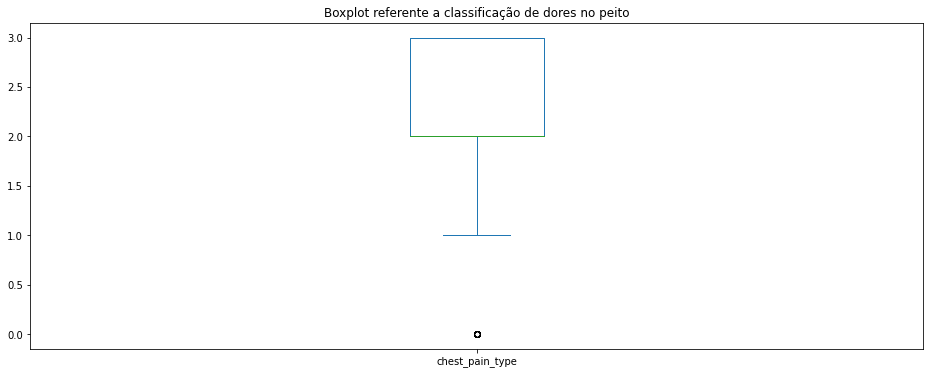

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot referente a classificação de dores no peito');
df['chest_pain_type'].astype(int).plot(kind='box');

####Distribuição da classificação de dores no peito por doença cardiovascular

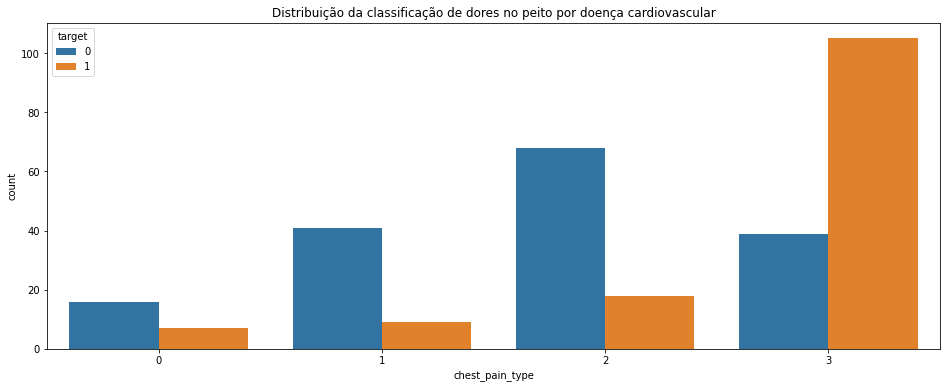

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição da classificação de dores no peito por doença cardiovascular')
sns.countplot(data=df,  x=df['chest_pain_type'].astype(int), hue='target');

In [0]:
pain_target_percent = pd.crosstab(df['chest_pain_type'], df['target'], normalize=True)
pain_target_percent

target,0,1
chest_pain_type,,
0,0.052805,0.023102
1,0.135314,0.029703
2,0.224422,0.059406
3,0.128713,0.346535


Pode-se notar que a maior parte de pessoas com doenças cardiovasculares são assintomáticas com relação a dores no peito.  
 Além disso, anginas típicas/atípicas não estão relacionadas a presença de doenças do coração.

# Conclusões e insights referentes a campanhas de conscientização

####  HealthHeart - Planos de saúde

  Com base na análise realizada, pôde-se constatar que pessoas na faixa etária entre 50 a 65 anos possuem maior propensão a doenças cardíacas. Além disso, notou-se que mesmo em casos onde as pessoas possuem uma doença cardiovascular, a maioria dos participantes são assintomáticas em relação a dores no peito. Diante disso, pode-se criar uma campanha mostrando que mesmo sem sintomas facilmente notáveis pelo paciente como a dor no peito, os resultados da pesquisa mostraram haver grande probabilidade da existência de comorbidades. Assim, sendo necessária a contratação de um plano de saúde pelos usuários, bem como o acompanhamento preventivo dos mesmos.

  Ademais, entregando valor ao produto comercializado pela empresa, poderia-se criar uma estratégia de plano de saúde com foco no tratamento de doenças do coração. Nesse plano haveria a disponibilização de 5 consultas com especialistas da área, assim como daria direito a exames trimestrais de acompanhamento do estado de saúde do paciente. Esse plano seria direcionado ao público mencionado acima e a estratégia de vendas poderia ser tomada com base no exposto.